In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [4]:
# Load dataset
df = pd.read_csv("/content/housing 2.csv")


In [5]:
# Drop categorical column and handle missing values
df = df.drop(columns=["ocean_proximity"])
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

<ipython-input-5-bcc023c3bdb5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


In [6]:
# Features and target for regression
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]


In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [10]:
# Define Neural Network for Regression
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

In [11]:
# Initialize model
input_size = X_train.shape[1]
model = RegressionNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
# Train model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 56297279488.0000
Epoch [20/100], Loss: 56297172992.0000
Epoch [30/100], Loss: 56296980480.0000
Epoch [40/100], Loss: 56296714240.0000
Epoch [50/100], Loss: 56296333312.0000
Epoch [60/100], Loss: 56295813120.0000
Epoch [70/100], Loss: 56295096320.0000
Epoch [80/100], Loss: 56294150144.0000
Epoch [90/100], Loss: 56292913152.0000
Epoch [100/100], Loss: 56291336192.0000


In [15]:

# Evaluate model
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.4f}, R^2: {r2:.4f}")


MSE: 55328269593.0854, R^2: -3.2222


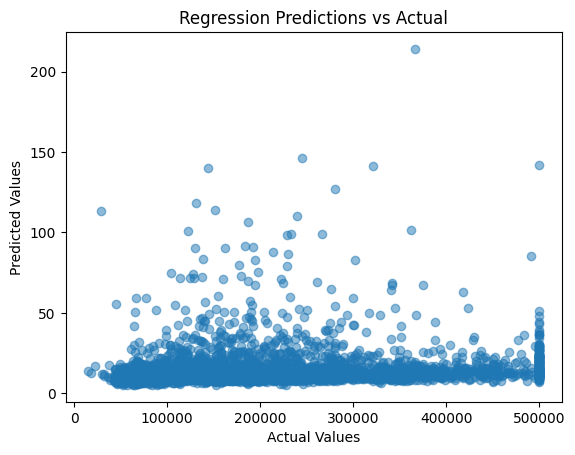

In [16]:
    # Plot predictions vs actual
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Regression Predictions vs Actual")
    plt.show()

In [17]:
threshold = df["median_house_value"].median()
y_class = (df["median_house_value"] >= threshold).astype(int)

# Split and convert data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [18]:
# Define Neural Network for Classification
class ClassificationNN(nn.Module):
    def __init__(self, input_size):
        super(ClassificationNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.model(x)


In [19]:
# Initialize model
model = ClassificationNN(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [20]:
# Train model
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.6410
Epoch [20/100], Loss: 0.5815
Epoch [30/100], Loss: 0.5207
Epoch [40/100], Loss: 0.4697
Epoch [50/100], Loss: 0.4356
Epoch [60/100], Loss: 0.4125
Epoch [70/100], Loss: 0.3947
Epoch [80/100], Loss: 0.3804
Epoch [90/100], Loss: 0.3693
Epoch [100/100], Loss: 0.3604


Accuracy: 0.8324, Precision: 0.8448, Recall: 0.8119, F1-score: 0.8280


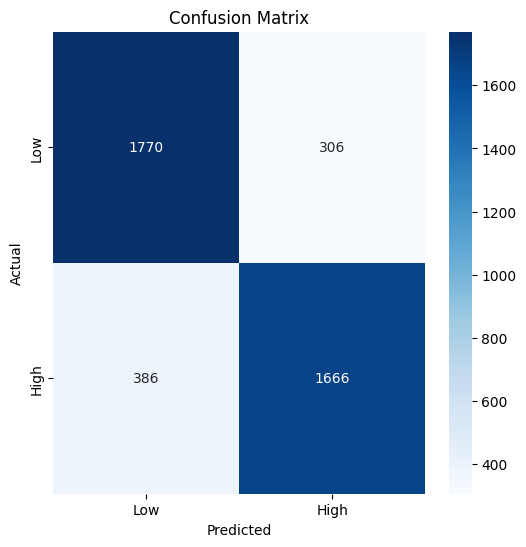

In [24]:
# Evaluate model
with torch.no_grad():
    y_pred = model(X_test_tensor).argmax(dim=1).numpy()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
